[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tamaragerber/climate_archives/blob/main/climate_proxies.ipynb)


# Climate proxies in Ice Cores

In [ ]:
# Install ipympl so that we can use interactive plots
!pip install ipympl
# And activate in Colab
from google.colab import output
output.enable_custom_widget_manager()

In [1]:
# --- file donwnload ---
import requests
import os
files = {'EGRIP_timescale.csv': 'https://unils-my.sharepoint.com/:x:/g/personal/tamara_gerber_unil_ch/IQDWyGVKQydKQIm3fq_1ARvMATr55P2-TQqIzzQdDdDe9T0?e=6MlhSX?download=1',
         'greenland_flowline.csv': 'https://unils-my.sharepoint.com/:x:/g/personal/tamara_gerber_unil_ch/IQDWyGVKQydKQIm3fq_1ARvMATr55P2-TQqIzzQdDdDe9T0?e=omafFq?download=1',
         'domec_d180.csv': 'https://unils-my.sharepoint.com/:x:/g/personal/tamara_gerber_unil_ch/IQCVnsLgGK6LQZoFgRlHaA76ARfRxhX81KLCTJOuwdnHQXs?download=1'
        }

for f in files:
    if os.path.exists(f):
        print('File already downloaded.')
    else:
        print('Downloading...')
        response = requests.get(files[f])
        open(f, 'wb').write(response.content)
print('Done.')

File already downloaded.
File already downloaded.
Done.


## Impurities
Impurities in ice cores originate from the atmosphere and are deposited with snowfall. They can be grouped into two broad types:

 **Aerosol-derived particles (solids)**  
  - Dust and minerals transported from continental deserts.  
  - Sea-salt particles (mainly Na⁺ and Cl⁻) from marine spray.  
  - Sulfate and nitrate salts from volcanic eruptions or anthropogenic sources.  
  - Soot or black carbon, and occasionally organic material.  

 **Soluble chemical species (liquids/acidic or basic ions)**  
   - Sulfate (SO₄²⁻), nitrate (NO₃⁻), chloride (Cl⁻),  
   - Ammonium (NH₄⁺), sodium (Na⁺), calcium (Ca²⁺), and others.  
   Once incorporated into the firn and ice, these ions remain trapped in the solid matrix or along grain boundaries and inclusions.

Impurities can be measured in discrete samples or continuously through the so-called **Continuous Flow Analysis (CFA)**. After ice cores are drilled they are usually cut into pieces which are used for different types of analysis. A central piece from the interior of the ice core is usually used for the CFA, to avoid contamination with materials that have touched the ice core surface. This ice stick is then melted contunuously on a warm plate and the meltwater stream is analysed in real time for multiple ions and acids (Na⁺, Ca²⁺, NH₄⁺, NO₃⁻, SO₄²⁻, etc.). This allows high-resolution (mm-scale) impurity profiles that reflect seasonal or sub-seasonal variations in atmospheric composition.

Another method that can be indicative of impurities is to measure the electrical conductivity. Because pure ice is an electrical insulator, most of the current actually travels along thin films of acidic liquid at the boundaries between ice crystals. The **Electrical Conductivity Measurement (ECM)** has the advantage of being non-destructive. Thereby a pair of electrodes is dragged along the ice core and the electrical conductivity is measured as a function of depth. The conductivity is increased when acidic impurities (such as H₂SO₄, HNO₃, HCl) are present because they lower the pH. Strong peaks in ECM are often related to sulfur acid deposited during volcanic eruptions. Dust and sea-salt particles often contain neutral or basic impurities (Ca²⁺, Na⁺, NH₄⁺) which have the potential to neutralize acids and decrease the conductivity of the ice. 

Impurity records serve several key purposes in ice-core science:

- **Establishing timescales & ice-core synchronization**: Because the atmospheric concentration of impurities varies with seasonality, they can be used to establish ice-core timescales through annual-layer counting in the upper parts of ice cores. Volcanic sulfate spikes provide absolute age markers when matched to known eruptions. Distinctive volcanic signals or abrupt impurity events (e.g., large dust peaks) appear across multiple cores and can be used to align timescales between sites.

- **Reconstructing past environments and climate changes**: Many impurities are linked to distinct atmospheric and climatic conditions, and can therefore be used to reconstruct the past climate. For example:  
  - Dust and Calcium (Ca²⁺) indicate atmospheric dustiness and source aridity.  
  - Sodium (Na⁺) and Chloride (Cl⁻) trace sea-ice extent and marine influence.  
  - Ammonium (NH₄⁺) relates to continental biogenic emissions.  
  - Nitrate (NO₃⁻) and sulfate (SO₄²⁻) reflect volcanic and anthropogenic emissions.

---

## Exercise 1

The NorthGRIP ice core (North Greenland Ice Core Project) was completed in 2003 and subsequently analyzed by continuous flow analysis (CFA) at the University of Bern.  
The resulting high-resolution impurity record, published by *Erhardt et al. (2021)*, spans the period from 42,000 to 10,000 years before present (BP).

This interval encompasses part of the last glacial period (approximately 115–11.7 ka BP), characterized by a series of abrupt climate fluctuations known as Dansgaard–Oeschger (D–O) events, driven by changes in North Atlantic ocean circulation. The Bølling–Allerød warm phase (14.7–12.9 ka BP) was followed by the Younger Dryas cold period (12.9–11.6 ka BP), which ended abruptly with the onset of the current interglacial, the Holocene (11.6 ka BP to present).

**a)** Examine how the different parameters vary over time.

- Which parameters show synchronous behaviour?
- How do their concentrations change during cold and warm periods (indicated by the oxygen isotope record in the bottom panel)?

**b)** Zoom in on the depth interval 1405–1410 m, where individual seasonal cycles can be seen.
 
- Describe briefly which parameters peak during summer and which during winter, and explain why these patterns occur.
- Estimate how many years are represented between 1405 m and 1410 m depth.

*Hint:* You can switch between a logarithmic and linear y-axis by uncommenting the line:

```python
# ax[i].set_yscale("log")



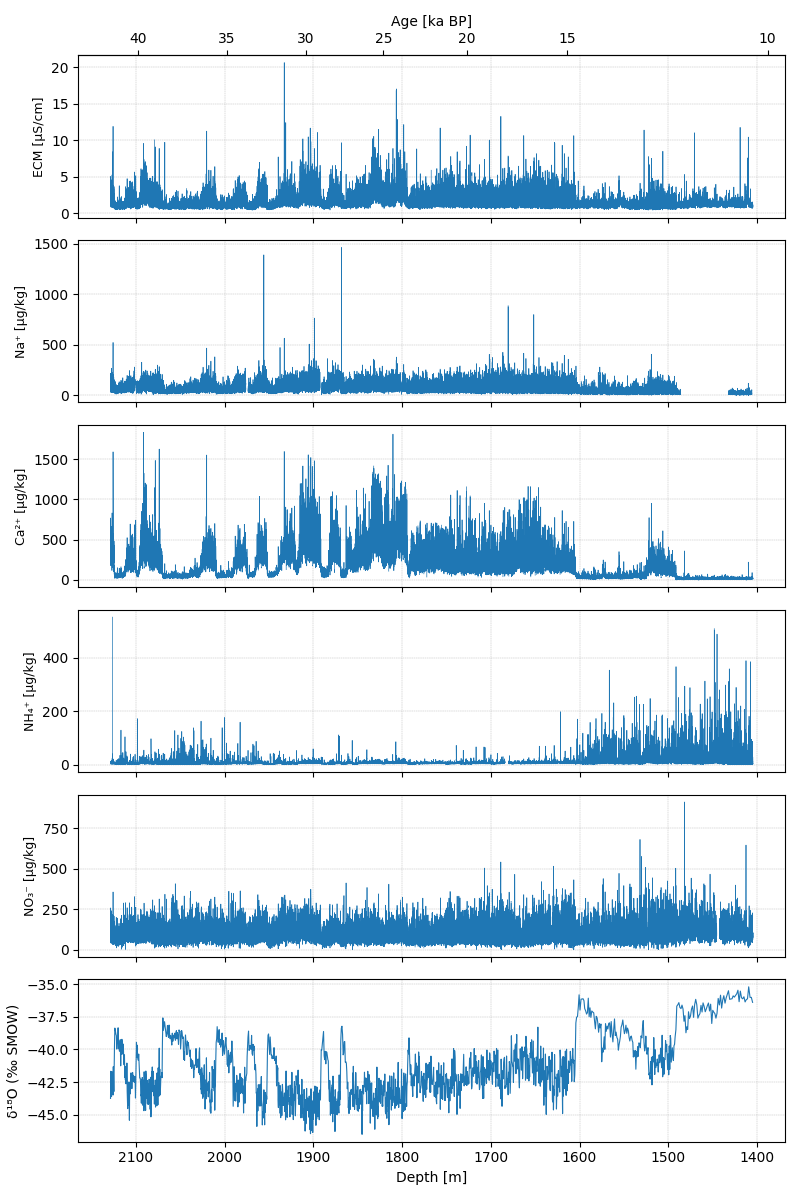

In [1]:
# --- imports ---
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

%matplotlib widget

# --- filenames ---
ngrip_impurity_file = "NGRIP_CFA_1mm.csv"
ngrip_isotope_file = "NGRIP_chronology_20.csv"

# --- 1. read impurity data ---
with open(ngrip_impurity_file, 'r') as f:
    for i, line in enumerate(f):
        if line.strip().startswith("Depth ice/snow"):
            header_line = i
            break

# Load data, skip metadata lines, convert numeric columns
ng_imp = pd.read_csv(ngrip_impurity_file, sep='\t', skiprows=header_line)
ng_imp = ng_imp.dropna(how='all').apply(pd.to_numeric, errors='coerce')

# --- 2. read isotope data ---
with open(ngrip_isotope_file, 'r') as f:
    for i, line in enumerate(f):
        if line.strip().startswith("Age [ka BP]"):
            header_line = i
            break

ng_iso = pd.read_csv(ngrip_isotope_file, sep='\t', skiprows=header_line)
ng_iso = ng_iso.dropna(how='all').apply(pd.to_numeric, errors='coerce')

# --- 3. extract relevant columns ---
ngrip_depth_imp = ng_imp["Depth ice/snow [m]"]
ngrip_depth_iso = ng_iso["Depth ice/snow [m]"]
ngrip_age = ng_iso["Age [ka BP]"]
ngrip_delta18O = ng_iso["δ18O H2O [‰ SMOW]"]

# Define impurity variables to plot (column name, label)
variables = [
    ("EC [µS/cm]", "ECM [µS/cm]"),
    ("Na+ [µg/kg]", "Na⁺ [µg/kg]"),
    ("Ca2+ [µg/kg]", "Ca²⁺ [µg/kg]"),
    ("[NH4]+ [µg/kg]", "NH₄⁺ [µg/kg]"),
    ("[NO3]- [µg/kg]", "NO₃⁻ [µg/kg]"),
]

# --- 4. interpolation functions ---
depth_to_age = interp1d(ngrip_depth_iso, ngrip_age, fill_value="extrapolate")
age_to_depth = interp1d(ngrip_age, ngrip_depth_iso, fill_value="extrapolate")

# --- 5. define overlapping depth range ---
depth_min = max(ngrip_depth_imp.min(), ngrip_depth_iso.min())
depth_max = min(ngrip_depth_imp.max(), ngrip_depth_iso.max())

mask_imp = (ngrip_depth_imp >= depth_min) & (ngrip_depth_imp <= depth_max)
mask_iso = (ngrip_depth_iso >= depth_min) & (ngrip_depth_iso <= depth_max)

# --- 6. create figure ---
fig, ax = plt.subplots(6, 1, figsize=(8, 12), sharex=True)

# Plot impurity records
for i, (col, label) in enumerate(variables):
    if col in ng_imp.columns:
        ax[i].plot(ngrip_depth_imp[mask_imp], ng_imp[col][mask_imp], lw=0.5)
        # Uncomment below to use logarithmic y-axis
        # ax[i].set_yscale("log")
        ax[i].set_ylabel(label, fontsize=9)
        ax[i].grid(True, which="both", ls="--", lw=0.3)
    else:
        # If a variable is missing, display a notice instead of an empty plot
        ax[i].text(0.5, 0.5, f"{col} missing", ha="center", va="center")
        ax[i].set_axis_off()

# Plot δ18O record (bottom panel)
ax[-1].plot(ngrip_depth_iso[mask_iso], ngrip_delta18O[mask_iso], color='tab:blue', lw=0.8)
ax[-1].invert_xaxis()  # Depth increases downward
ax[-1].set_ylabel("δ¹⁸O (‰ SMOW)")
ax[-1].set_xlabel("Depth [m]")
ax[-1].grid(True, which="both", ls="--", lw=0.3)

# Add secondary x-axis (age in ka BP)
secax = ax[0].secondary_xaxis('top', functions=(depth_to_age, age_to_depth))
secax.set_xlabel("Age [ka BP]")

plt.tight_layout()
plt.show()


## δ¹⁸O Isotopes

In the previous exercise, you explored how the concentration of impurities and the oxygen isotope ratio in ice vary with depth, reflecting changes in climatic conditions on both seasonal and longer timescales. The oxygen isotope ratio (δ¹⁸O) is one of the most powerful proxies used to reconstruct past temperatures and understand large-scale climate variations: no other proxy gives such a continuous and high-resolution view of climate history along most of a core.

Oxygen atoms occur in different stable isotopic forms, mainly **¹⁶O** and **¹⁸O**. The lighter isotope (¹⁶O) is by far the most abundant, but a small fraction of oxygen atoms are the heavier ¹⁸O isotope. Because the mass of ¹⁸O is greater, molecules of H₂¹⁸O behave slightly differently from H₂¹⁶O during phase changes such as evaporation and condensation.  

Most water vapour in the atmosphere originates from ocean evaporation. During this process, molecules containing the lighter ¹⁶O isotope evaporate more easily, leaving the ocean slightly enriched in ¹⁸O. As moist air cools and condenses into precipitation, the opposite happens: heavier ¹⁸O molecules condense and precipitate more readily, so the remaining vapour becomes increasingly depleted in ¹⁸O.  

This process of *fractionation* depends strongly on temperature. The colder the air mass becomes as it moves poleward and upward, the more depleted its vapour (and therefore the precipitation) becomes in ¹⁸O. As a result, the ratio between ¹⁸O and ¹⁶O in deposited snow becomes more negative compared to the isotope ratio of the ocean. Since the ratio between ¹⁸O and ¹⁶O is very small, measurements are usually made in terms of the δ-values. This value compares the ratio ¹⁸O/¹⁶O of ice to the ratio of 'standard mean ocean water':

$\delta^{18}O = \left[\frac{^{18}O/^{16}O_{ice}}{^{18}O/^{16}O_{SMOW}}-1\right]$.

---
### Exercise 2

**a)** Compare the isotope records between the NorthGRIP ice core, drilled in central Greenland, and the EPICA Dome C ice core, drilled on the antarctic plateau in East Antarctica. Why do you think the delta values from Dome C are generally more negative than from NorthGRIP? Can you spot any other differences in the record?

**b)** Until last year, the EPICA Dome C ice core held the record as the longest continuous ice-core archive, extending back 800,000 years.  
(This has now been surpassed by the Beyond EPICA core, drilled about 30 km from Dome C, which has reached ice that is at least 1.2 million years old). How many glacial–interglacial cycles (i.e., alternating warm and cold periods) can you identify within the past 800,000 years of the Dome C record?

**c)** In general, $\delta {18}O$ varies in proportation to the climatic temperature in the region of an ice-core site ($T_i$):

$\Delta \delta_i = \alpha\Delta T_i + \Theta$, 

where $\Theta$ contains all the variations of $\delta$ that are not related with changes of site temperature $T_i$. The isotropic sensitivity $\alpha$ must be empirically determined and varies from site to site. For the antarctic central mainland $\alpha$ has been determined to be 0.9 $\textperthousand C^{-1}$ and for central Greenland $\alpha$= 0.4 $\textperthousand C^{-1}$ is a valid assumption. 

For both records, make a simplified estimated temperature reconstruction using the above relation, while assuming that $\Theta$ is zero. How many degrees of warming occured at the two sites during the last deglatiation, e.g. betweeen 20 ka bp and present day? When was the last time that temperatures were as high as today? 

*Note*: in reality, there are a few more parameters that affect the d18O, and $\alpha$ varies over time. Such effects can include for example the temperature at the water vapour source region, strength of evaporation recharge, source region location, seasonal timing of accumulation, warm weather bias (e.g. more snow falls in warmer air), cloud properties, cyclone characteristics, or post-depositional alteration. As a result, temperature reconstructions from δ¹⁸O are much more complex than suggested by this simplified exercise.


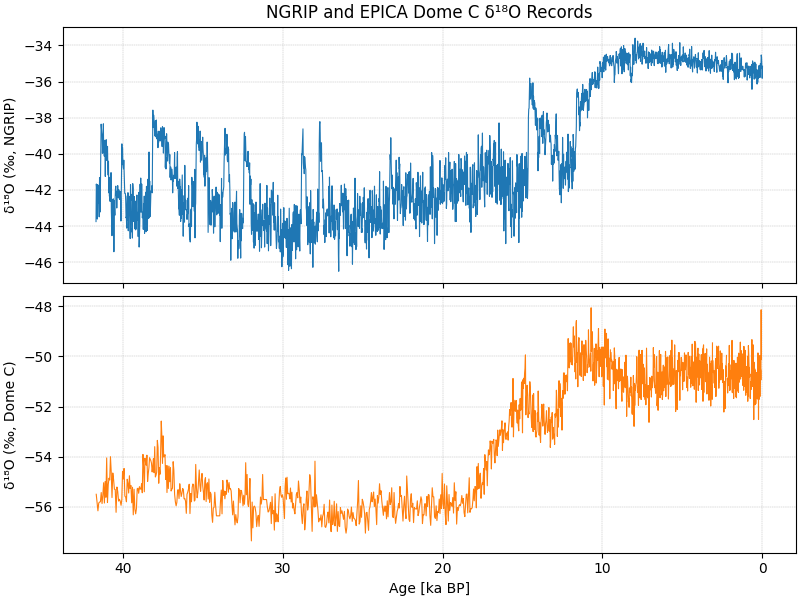

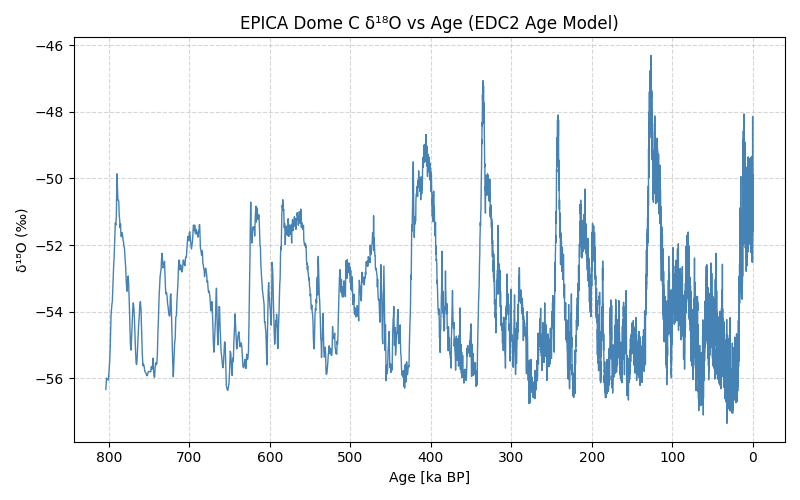

In [3]:
# 2a) Plot NGRIP and EPICA Dome C δ18O records

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Load Dome C δ18O data ---
dc_iso = pd.read_csv("domec_d18O.csv")

# --- Define age range from NGRIP record ---
age_min, age_max = np.nanmin(ngrip_age), np.nanmax(ngrip_age)

# --- Subset Dome C data to match NGRIP age range ---
mask = (dc_iso["age"] >= age_min) & (dc_iso["age"] <= age_max)
iso_sub = dc_iso.loc[mask]

# --- Plot NGRIP and Dome C ---
fig, axes = plt.subplots(2, 1, figsize=(8, 6), sharex=True, constrained_layout=True)

# Panel 1: NGRIP
axes[0].plot(ngrip_age, ngrip_delta18O, color='tab:blue', lw=0.8)
axes[0].set_ylabel("δ¹⁸O (‰, NGRIP)")
axes[0].grid(True, ls="--", lw=0.3)
axes[0].set_title("NGRIP and EPICA Dome C δ¹⁸O Records")

# Panel 2: Dome C
axes[1].plot(iso_sub["age"], iso_sub["d18O"], color='tab:orange', lw=0.8)
axes[1].set_xlabel("Age [ka BP]")
axes[1].set_ylabel("δ¹⁸O (‰, Dome C)")
axes[1].grid(True, ls="--", lw=0.3)
axes[1].invert_xaxis()

plt.show()

# 2b) Plot Dome C only
plt.figure(figsize=(8, 5))
plt.plot(dc_iso["age"], dc_iso["d18O"], color='steelblue', lw=1)
plt.gca().invert_xaxis()
plt.xlabel("Age [ka BP]")
plt.ylabel("δ¹⁸O (‰)")
plt.title("EPICA Dome C δ¹⁸O vs Age (EDC2 Age Model)")
plt.grid(True, ls="--", alpha=0.5)
plt.tight_layout()
plt.show()


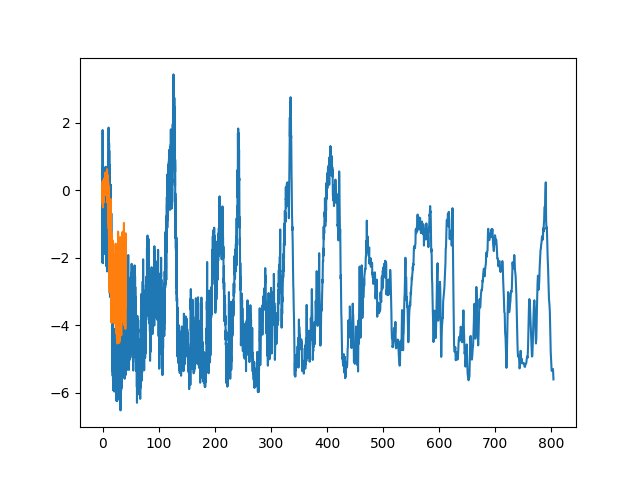

In [6]:
# 2c)
# calculate temperature differences
dT_domec = ...
dT_ngrip = ...

plt.figure()
plt.plot(dc_iso["age"], dT_domec-dT_domec[0])
plt.plot(ngrip_age, dT_ngrip-dT_ngrip[0])


## Greenhouse Gas Records

At cold polar sites, the air bubbles trapped in glacial ice contain ancient air samples whose concentrations of greenhouse gases (CO₂, CH₄, N₂O) closely reflect the atmospheric composition at the time of bubble closure. Because these gases are well mixed globally, their concentrations represent global atmospheric conditions, in contrast to isotopic or impurity records (e.g. δ¹⁸O, dust), which mainly record local climate.

In the upper part of the firn (the porous snowpack above the impermeable ice), air can still circulate freely with the atmosphere. Gas becomes permanently sealed only when the firn reaches a density of about 830 kg m⁻³, known as the pore close-off density.  
Since the ice enclosing the air was formed earlier (from snowfall that has already compacted into ice), the trapped gas is younger than the surrounding ice.

The age difference between the gas and the ice is called:

$\Delta_{age} = \text{Age}_{\text{gas}} - \text{Age}_{\text{ice}}$

It depends on how quickly layers are buried (accumulation rate) and how fast the firn densifies.  
The firn density profile can be approximated by the relationship:

$\rho_i\,\tilde{b}\,\Delta_{age} = \int_{0}^{z_c} \rho(z)\,dz$

where  
- $\rho_i$: density of pure ice (917 kg m⁻³)  
- $\tilde{b}$: mean annual accumulation rate (kg m⁻² yr⁻¹)  
- $z_c$: close-off depth (m)  
- $\rho(z)$: density profile of the firn (kg m⁻³)

---

### **Exercise 3**

**a)** Plot the Dome C $\delta ^{18}O$ record (from the previous exercise) and the CO₂ concentration record (`domec_co2.csv`) from the EPICA Dome C ice core side by side. You can extend the CO₂ curve with the most recent atmospheric CO₂ concentration (e.g., from [https://www.co2.earth/daily-co2](https://www.co2.earth/daily-co2)).

- Estimate how much the two records appear shifted in time — i.e., by how many years does the CO₂ rise lag the temperature ($\delta ^{18}O$) increase during the last deglaciation? 


**b)** The file `domec_co2.csv` gives the age of the ice surrounding each air sample. Using the equation above, calculate the Δage for Dome C.
You can approximate the firn density with a simple analytical function:

$\rho(z) = \rho_i - (\rho_i - \rho_0)\, e^{-kz}$,

where the surface density $\rho_0$ is 300 kg m⁻³ and the ice density $\rho_i$ is 917 kg m⁻³. Choose the parameter $k$ such that $ \rho(z_c) = \rho_c $:

$k = -\frac{1}{z_c}\,\ln\!\left(\frac{\rho_i - \rho_c}{\rho_i - \rho_0}\right)$.

Then evaluate:

$\Delta_{age} = \frac{1}{\rho_i\,\tilde{b}} \int_{0}^{z_c}\rho(z)\,dz$, 

whereby assuming that under present-day conditions the accumulation rate, $\tilde{b}$, is 0.028 m ice yr⁻¹, bubble close-off density, $\rho_c$, is 830 kg m⁻¹, and the bubble close-off depth, $z_c$, is 100 m. 

Report the resulting $\Delta_{age}$ in years. How does this change the answer from a)? What do you need to take into account when making the age correction for the entire ice-core record?


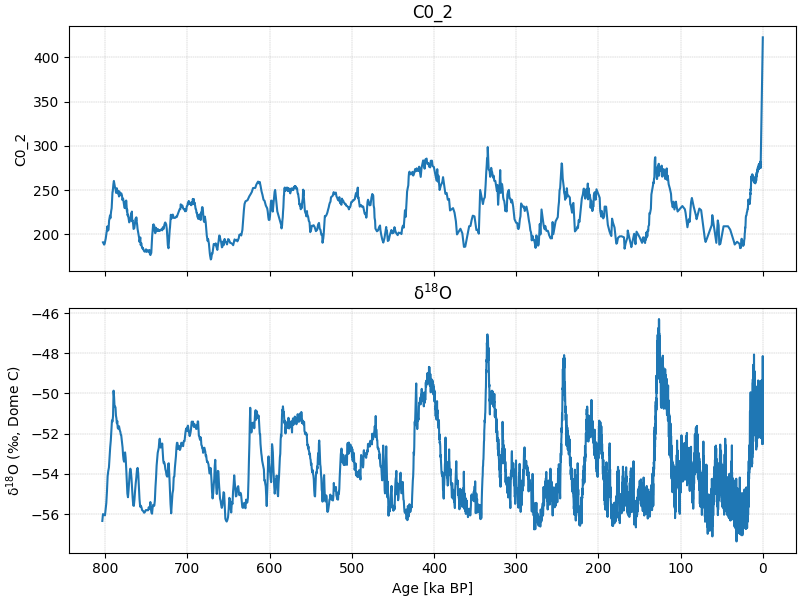

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#3a)
# --- 1. Read co2 data ---
domec_co2 = pd.read_csv("domec_co2.csv")

# Create figure with two aligned panels
fig, axes = plt.subplots(2, 1, figsize=(8, 6), sharex=True, constrained_layout=True)

present_day_co2 = ...

axes[0].plot(np.concatenate(([0], domec_co2["model_age"]))/1000, np.concatenate(([present_day_co2], domec_co2["co2"])))
axes[0].set_ylabel("C0_2")
axes[0].grid(True, ls="--", lw=0.3)
axes[0].set_title("C0_2")

axes[1].plot(dc_iso["age"], dc_iso["d18O"])
axes[1].set_xlabel("Age [ka BP]")
axes[1].set_ylabel("δ$^{18}$O (‰, Dome C)")
axes[1].grid(True, ls="--", lw=0.3)
axes[1].set_title("δ$^{18}$O")
axes[1].invert_xaxis()

Estimated Δage at Dome C ≈ 2518 years


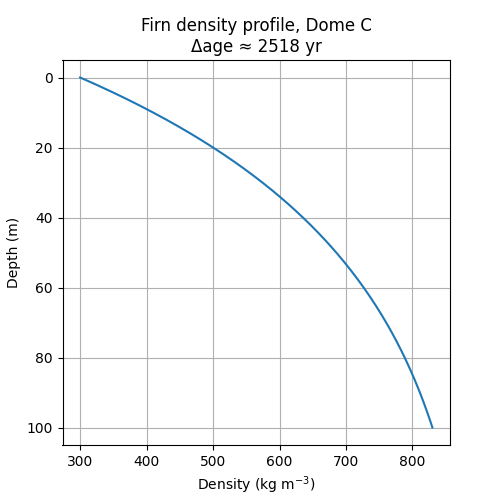

In [33]:
import numpy as np
import matplotlib.pyplot as plt
# 3b)
# ---- Parameters for Dome C ----
rho_i = ...     # kg/m3, density of ice
rho0 = ...        # kg/m3, surface density
rho_c = ...       # kg/m3, close-off density
z_c = ...         # m, close-off depth
b = ...            # kg m^-2 yr^-1, accumulation rate (~0.028 m ice/yr)

# ---- Firn density profile ----
k = ...
z = np.linspace(0, z_c, 200)
rho = ...

# ---- Integrate density over depth ----
#integral = np.trapz(rho, z)  # kg/m2

# ---- Compute Delta age ----
#Delta_age = integral / (rho_i * b)  # in years
#print(f"Estimated Δage at Dome C ≈ {Delta_age:.0f} years")

# ---- Plot density profile ----
plt.figure(figsize=(5,5))
plt.plot(rho, z)
plt.gca().invert_yaxis()
plt.xlabel("Density (kg m$^{-3}$)")
plt.ylabel("Depth (m)")
plt.title(f"Firn density profile, Dome C\nΔage ≈ {Delta_age:.0f} yr")
plt.grid(True)
plt.show()
